In [1]:
#Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [4]:
df.describe()

day month  year Temperature   RH   Ws Rain   FFMC  DMC   DC  ISI  BUI  \
count   246   245   245         245  245  245   245   245  245  245  245  245   
unique   33     5     2          20   63   19    40   174  167  199  107  175   
top      01    07  2012          35   64   14     0  88.9  7.9    8  1.1    3   
freq      8    62   244          29   10   43   133     8    5    5    8    5   

        FWI Classes    
count   245       244  
unique  128         9  
top     0.4   fire     
freq     12       131

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [8]:
df.loc[:122,'Region']=0
df.loc[123:,'Region']=1

In [9]:
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    Region  
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN     0.0  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN     1.0

In [10]:
df=df.dropna().reset_index(drop=True)

In [11]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  , Region]
Index: []

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire        0.0  
1  not fire        0.0  
2  not fire        0.0  
3  not fire        0.0  
4  not fire        0.0

In [14]:
# Remove whitespaces
df.columns=df.columns.str.strip() 


In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [17]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [18]:
df['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    float64
dtypes: float64(1), int32(1), object(13)
memory usage: 27.8+ KB


In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.iloc[122,:]

day                    day
month                month
year                  year
Temperature    Temperature
RH                      RH
Ws                      Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes                  1
Region                 1.0
Name: 122, dtype: object

In [22]:
df=df.drop(122).reset_index(drop=True)

In [23]:
df.iloc[122,:]

day              01
month            06
year           2012
Temperature      32
RH               71
Ws               12
Rain            0.7
FFMC           57.1
DMC             2.5
DC              8.2
ISI             0.6
BUI             2.8
FWI             0.2
Classes           0
Region          1.0
Name: 122, dtype: object

In [24]:
df[['day','month', 'year','Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year','Temperature', 'RH', 'Ws']].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    int32  
 14  Region       243 non-null    float64
dtypes: float64(1), int32(7), object(7)
memory usage: 22.0+ KB


In [26]:
df["Region"]=df["Region"].astype(int)

In [27]:
objs=[features for features in df.columns if df[features].dtype=='O']

In [28]:
for x in objs:
    df[x]=df[x].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int32  
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.0 KB


<AxesSubplot:>

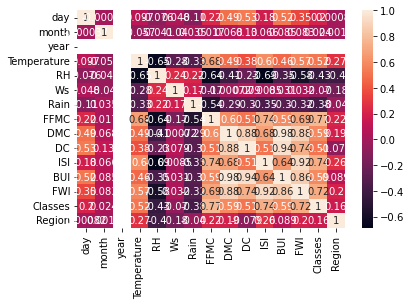

In [30]:
sns.heatmap(df.corr(),annot=True)

In [31]:
dftemp=df[df['Region']==0].copy()

In [32]:
dftemp

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0      1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1      2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2      3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3      4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4      5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...  ...   ...  ...  ...   
117   26      9  2012           31  54  11   0.0  82.0  6.0  16.3  2.5  6.2   
118   27      9  2012           31  66  11   0.0  85.7  8.3  24.9  4.0  9.0   
119   28      9  2012           32  47  14   0.7  77.5  7.1   8.8  1.8  6.8   
120   29      9  2012           26  80  16   1.8  47.4  2.9   7.7  0.3  3.0   
121   30      9  2012           25  78  14   1.4  45.0  1.9   7.5  0.2  2.4   

     FWI  Classes  Region  
0    0.5        0       0  
1    0.4        0       0  
2    0.1        0       0  
3    0.0        0       0  
4    0.5        0       0  
..   ...      ...     ...  
117  1.7        0       0  
118  4.1        1       0  
119  0.9        0       0  
120  0.1        0       0  
121  0.1        0       0  

[122 rows x 15 columns]

Text(0.5, 1.0, 'Fire Analysis for Sidebel Regions')

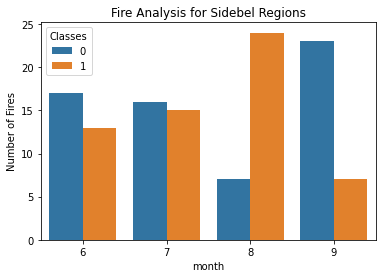

In [33]:
sns.countplot(x="month",hue='Classes',data=dftemp)
plt.ylabel("Number of Fires")
plt.title("Fire Analysis for Sidebel Regions")

Text(0.5, 1.0, 'Fire Analysis for Braijia Regions')

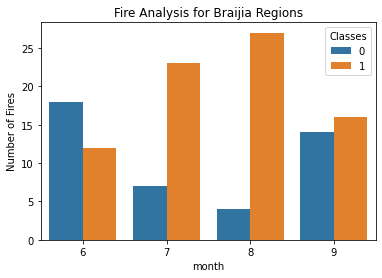

In [34]:
dftemp=df[df['Region']==1].copy()

sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel("Number of Fires")
plt.title("Fire Analysis for Braijia Regions")

In [35]:
# More fires are happeningg in region 1 i.e Braijia

In [36]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0

In [37]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [38]:
df.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0

<AxesSubplot:>

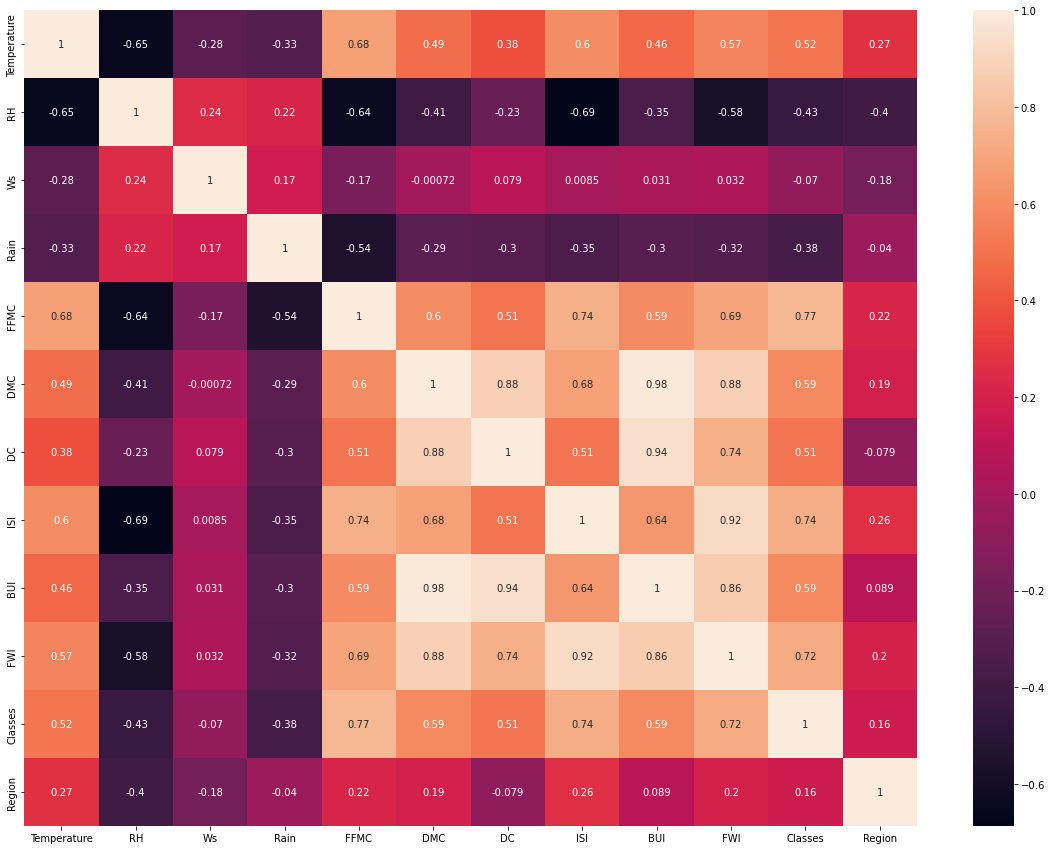

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [40]:
def corelation(dataset,threshold):
    col_corr=set()
    corr=dataset.corr()
    for x in range(len((dataset.columns))):
        for y in range(x):
            if abs(corr.iloc[x,y])>threshold:
                colname=corr.columns[x]
                col_corr.add(colname)
    return col_corr

In [41]:
corelation(df,0.85)

{'BUI', 'DC', 'FWI'}

In [42]:
df.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.651400 -0.284510 -0.326492  0.676568  0.485687   
RH             -0.651400  1.000000  0.244048  0.222356 -0.644873 -0.408519   
Ws             -0.284510  0.244048  1.000000  0.171506 -0.166548 -0.000721   
Rain           -0.326492  0.222356  0.171506  1.000000 -0.543906 -0.288773   
FFMC            0.676568 -0.644873 -0.166548 -0.543906  1.000000  0.603608   
DMC             0.485687 -0.408519 -0.000721 -0.288773  0.603608  1.000000   
DC              0.376284 -0.226941  0.079135 -0.298023  0.507397  0.875925   
ISI             0.603871 -0.686667  0.008532 -0.347484  0.740007  0.680454   
BUI             0.459789 -0.353841  0.031438 -0.299852  0.592011  0.982248   
FWI             0.566670 -0.580957  0.032368 -0.324422  0.691132  0.875864   
Classes         0.516015 -0.432161 -0.069964 -0.379097  0.769492  0.585658   
Region          0.269555 -0.402682 -0.181160 -0.040013  0.222241  0.192089   

                   DC       ISI       BUI       FWI   Classes    Region  
Temperature  0.376284  0.603871  0.459789  0.566670  0.516015  0.269555  
RH          -0.226941 -0.686667 -0.353841 -0.580957 -0.432161 -0.402682  
Ws           0.079135  0.008532  0.031438  0.032368 -0.069964 -0.181160  
Rain        -0.298023 -0.347484 -0.299852 -0.324422 -0.379097 -0.040013  
FFMC         0.507397  0.740007  0.592011  0.691132  0.769492  0.222241  
DMC          0.875925  0.680454  0.982248  0.875864  0.585658  0.192089  
DC           1.000000  0.508643  0.941988  0.739521  0.511123 -0.078734  
ISI          0.508643  1.000000  0.644093  0.922895  0.735197  0.263197  
BUI          0.941988  0.644093  1.000000  0.857973  0.586639  0.089408  
FWI          0.739521  0.922895  0.857973  1.000000  0.719216  0.197102  
Classes      0.511123  0.735197  0.586639  0.719216  1.000000  0.162347  
Region      -0.078734  0.263197  0.089408  0.197102  0.162347  1.000000

In [43]:

df.drop(['BUI','DC'],axis=1,inplace=True)

In [44]:
df.head()

Temperature  RH  Ws  Rain  FFMC  DMC  ISI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4  1.3  0.5        0       0
1           29  61  13   1.3  64.4  4.1  1.0  0.4        0       0
2           26  82  22  13.1  47.1  2.5  0.3  0.1        0       0
3           25  89  13   2.5  28.6  1.3  0.0  0.0        0       0
4           27  77  16   0.0  64.8  3.0  1.2  0.5        0       0

In [45]:
# Independent Features

X=df.drop("FWI",axis=1).copy()

#Dependent Features
y=df["FWI"].copy()

In [46]:
#Train-test split

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 9), (73, 9), (170,), (73,))

In [49]:
# Standardization

In [50]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [51]:
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)


In [53]:
from sklearn.linear_model import LinearRegression,ElasticNet,ElasticNetCV,Lasso,Ridge

In [58]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)


LinearRegression()

In [59]:
lr.coef_,lr.intercept_

(array([-0.06743838, -0.22114448, -0.01027585, -0.03604682, -0.79405484,
         3.78370099,  4.77116003,  0.39717583, -0.40052359]),
 7.12764705882353)

In [60]:
y_pred=lr.predict(X_test_scaled)

In [61]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [62]:
mse=mean_absolute_error(y_test,y_pred)
mn=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

r2,mn,mse

(0.9847206874554418, 0.6829306792403725, 0.5648036371485072)

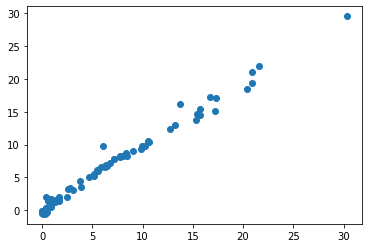

In [63]:
plt.scatter(y_test,y_pred)

In [64]:
el=ElasticNetCV(cv=5)
el.fit(X_train_scaled,y_train)

ElasticNetCV(cv=5)

In [65]:
el.coef_,el.intercept_

(array([-0.        , -0.23440767,  0.0479142 ,  0.        , -0.4569884 ,
         3.66077127,  4.40062379,  0.41067701, -0.32996606]),
 7.12764705882353)

In [66]:
y_test=el.predict(X_test_scaled)
mse=mean_absolute_error(y_test,y_pred)
mn=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

r2,mn,mse

(0.9981944532297338, 0.07412166421552452, 0.2159844133824271)

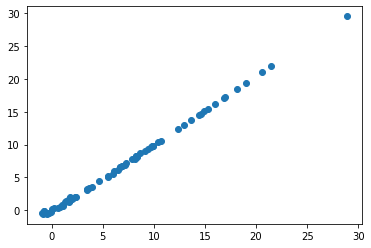

In [67]:
plt.scatter(y_test,y_pred)

In [68]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
lasso.coef_,lasso.intercept_

(array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
         3.06746417,  3.97872321,  0.        , -0.        ]),
 7.12764705882353)

In [69]:
y_test=lasso.predict(X_test_scaled)
mse=mean_absolute_error(y_test,y_pred)
mn=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

r2,mn,mse

(0.9631726215428993, 1.1463757427180759, 0.8515229072665649)

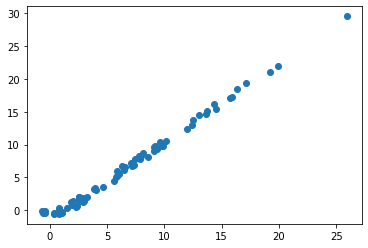

In [70]:
plt.scatter(y_test,y_pred)

In [72]:
# From all the above algo ElasticnetCV has a better r2 score hence we will store it

In [73]:
import pickle

In [74]:
pickle.dump(el,open('elastic.pkl','wb'))
pickle.dump(scalar,open('scalar.pkl','wb'))